In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

In [2]:
# Load Dataframe
df = pd.read_csv("UsArrests.csv")
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


The info() function helps to indicate what datatypes are available in the dataset. City is the only non-numerical variable in the dataset all other data is numerical.

In [5]:
df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

No missing values in the dataset, therefore no blanks or null values needs to be filled.

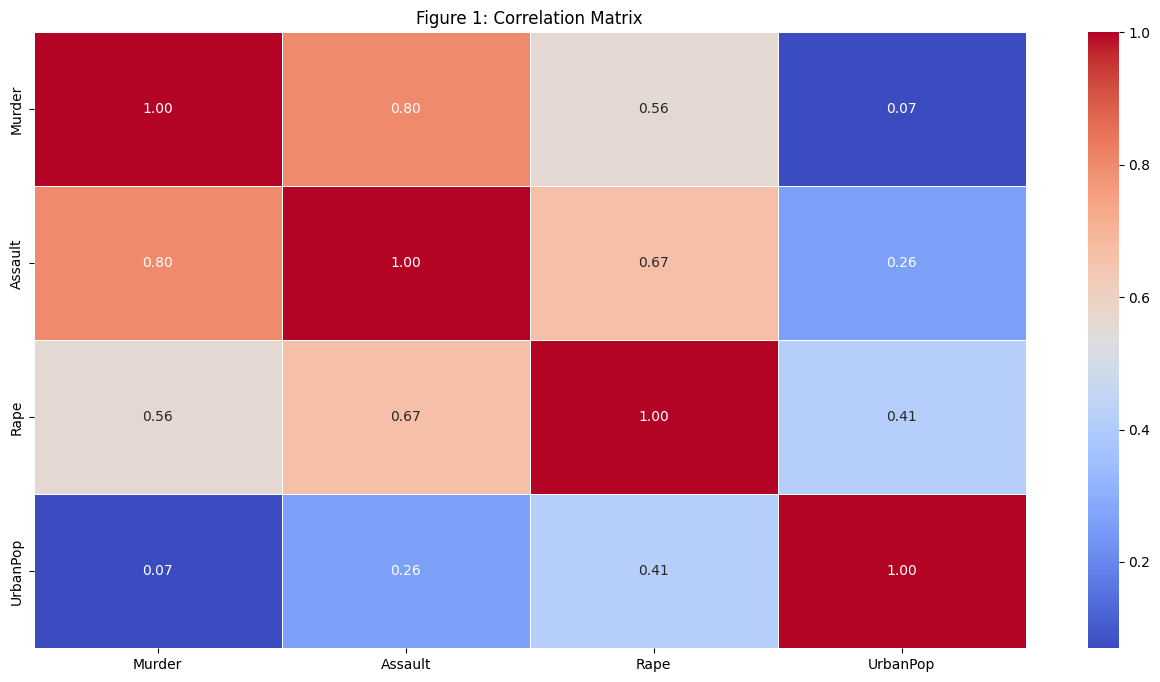

In [6]:
# Correlations Matrix
features = ["Murder", "Assault", "Rape", "UrbanPop"]
correlation_matrix = df[features].corr()

plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Figure 1: Correlation Matrix")
plt.show()

The closer the value to 1 the stronger the correlation. The strongest correlations are between assault and murder, followed by assault and rape. Urban populations has a weak correlation between the different crime types inidcating that the size of the population has a weak impact on the number of crime in the different cities. Murder and urban population has the lowest correlation showing that urban population does not influence the murder rate occuring in a city. The correlation matrix xlearly inidicates that assault goes along with murder and rape.

In [7]:
X = df[features]
y = df["City"]

Explained variance ratio:  [0.62  0.247 0.089 0.043]
Cumulative:  [0.62  0.868 0.957 1.   ]


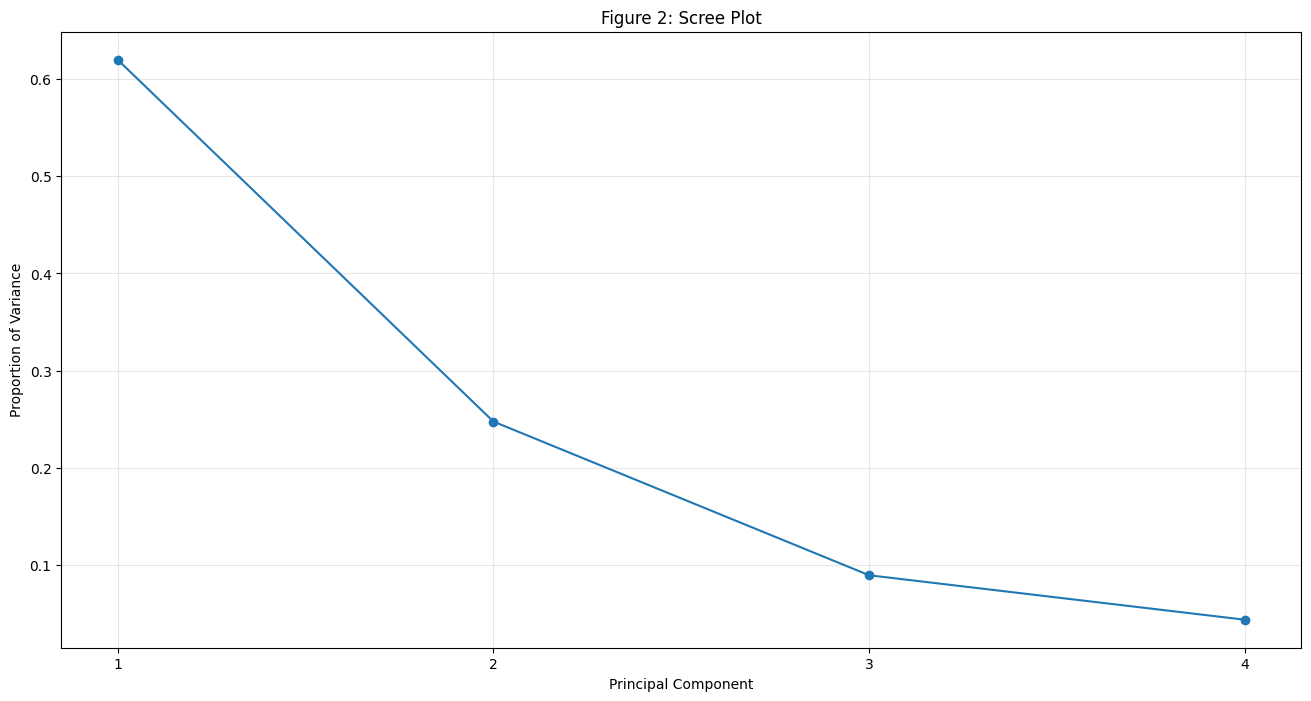

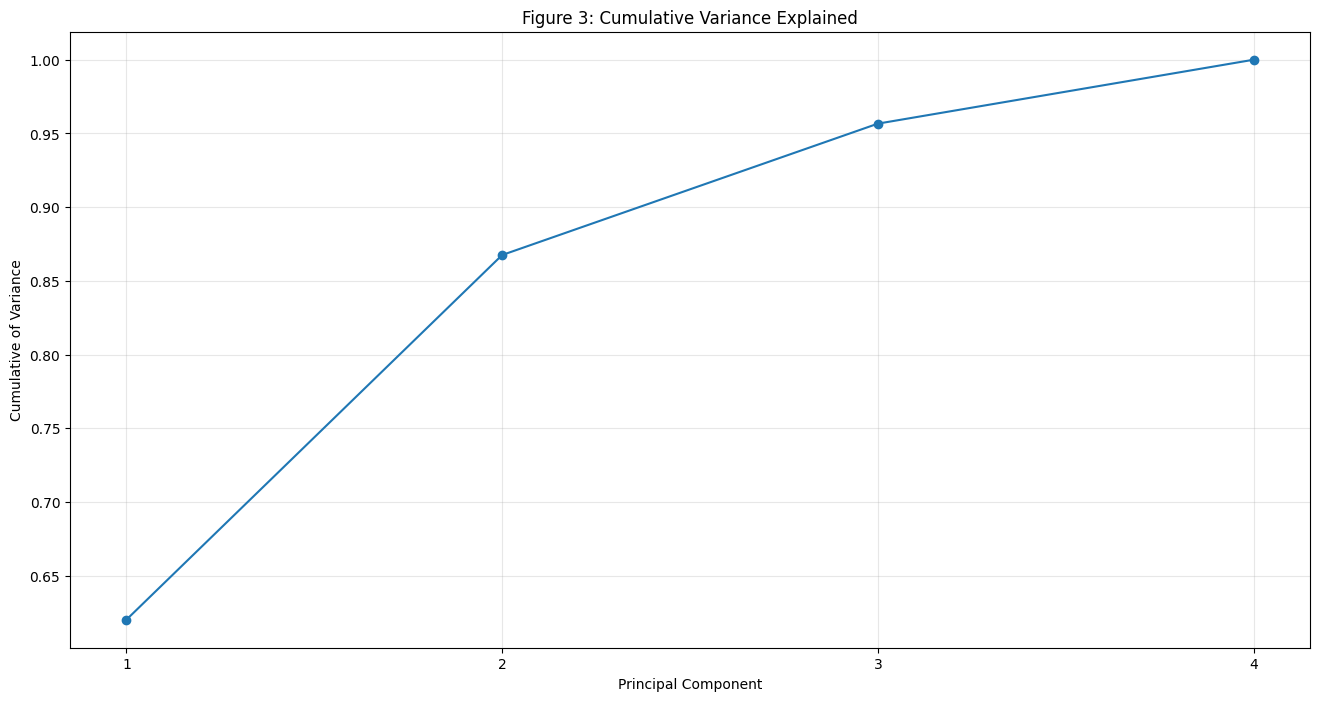

In [8]:
# Scaling data with StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=4, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Dataframe with principal components
df_pca = pd.DataFrame(data=X_pca, columns=["PC1", "PC2", "PC3", "PC4"])

# Explained Variance
print("Explained variance ratio: ", np.round(pca.explained_variance_ratio_, 3))
print("Cumulative: ", np.round(np.cumsum(pca.explained_variance_ratio_), 3))

plt.figure(figsize=(16,8))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, marker="o")
plt.xticks([1,2,3,4])
plt.grid(True, alpha=.3)
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance")
plt.title("Figure 2: Scree Plot")
plt.show()

plt.figure(figsize=(16,8))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xticks([1,2,3,4])
plt.grid(True, alpha=.3)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative of Variance")
plt.title("Figure 3: Cumulative Variance Explained")
plt.show()

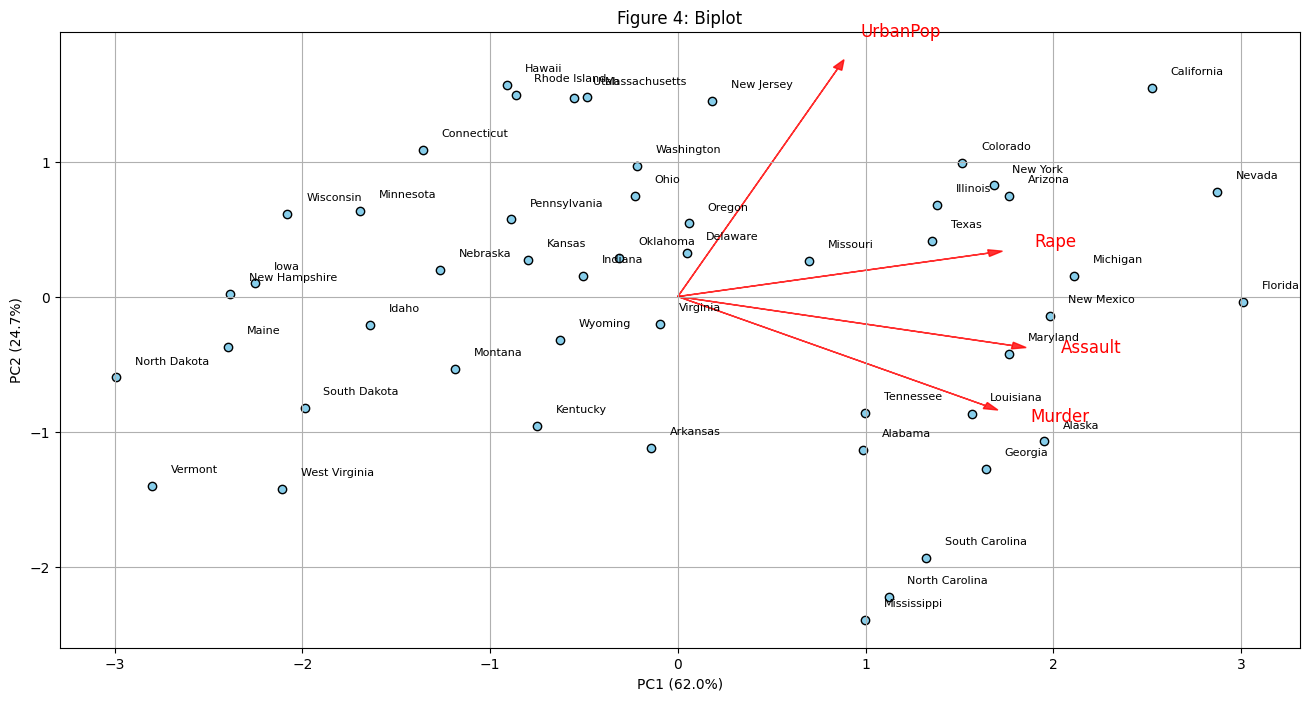

In [9]:
# Biplot for PC1 and PC2
plt.figure(figsize=(16,8))
plt.scatter(df_pca["PC1"], df_pca["PC2"], color="skyblue", edgecolor="k")

for i, city in enumerate(df["City"]):
    plt.text(df_pca["PC1"][i]+0.1, df_pca["PC2"][i]+0.1, city, fontsize=8)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
arrow_scale = 2.0

for i, feature in enumerate(features):
    x = loadings[i, 0] * arrow_scale
    y = loadings[i, 1] * arrow_scale
    plt.arrow(0, 0, x, y, color="red", alpha=0.8, head_width=0.05, length_includes_head=True)
    plt.text(x * 1.1, y* 1.1, feature, color="red", fontsize=12)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("Figure 4: Biplot")
plt.grid(True)
plt.show()

Cities that are closely plotted are similar in terms of the four variable idenitfied. Arrows that point in a similar direction have a positive correlation, in the above biplot assault and murder vectors point in a similar direction and the angle between the two vectors are also the least showing a strong relationship.
UrbanPop does not have a strong positive correlation with the other three variables, rape, murder and assault.

In [10]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca[:, :3])
df["KMeans_Cluster"] =kmeans_labels
pd.crosstab(df["City"], df["KMeans_Cluster"])

KMeans_Cluster,0,1,2
City,,,
Alabama,0,1,0
Alaska,0,0,1
Arizona,0,0,1
Arkansas,0,1,0
California,0,0,1
Colorado,0,0,1
Connecticut,1,0,0
Delaware,1,0,0
Florida,0,0,1


The scree plot indicates the elbow at PC2 but the cumulative variance is less than 90% therefore I chose PC3 that has the cumulative variance of 96% which captures almost all variances.

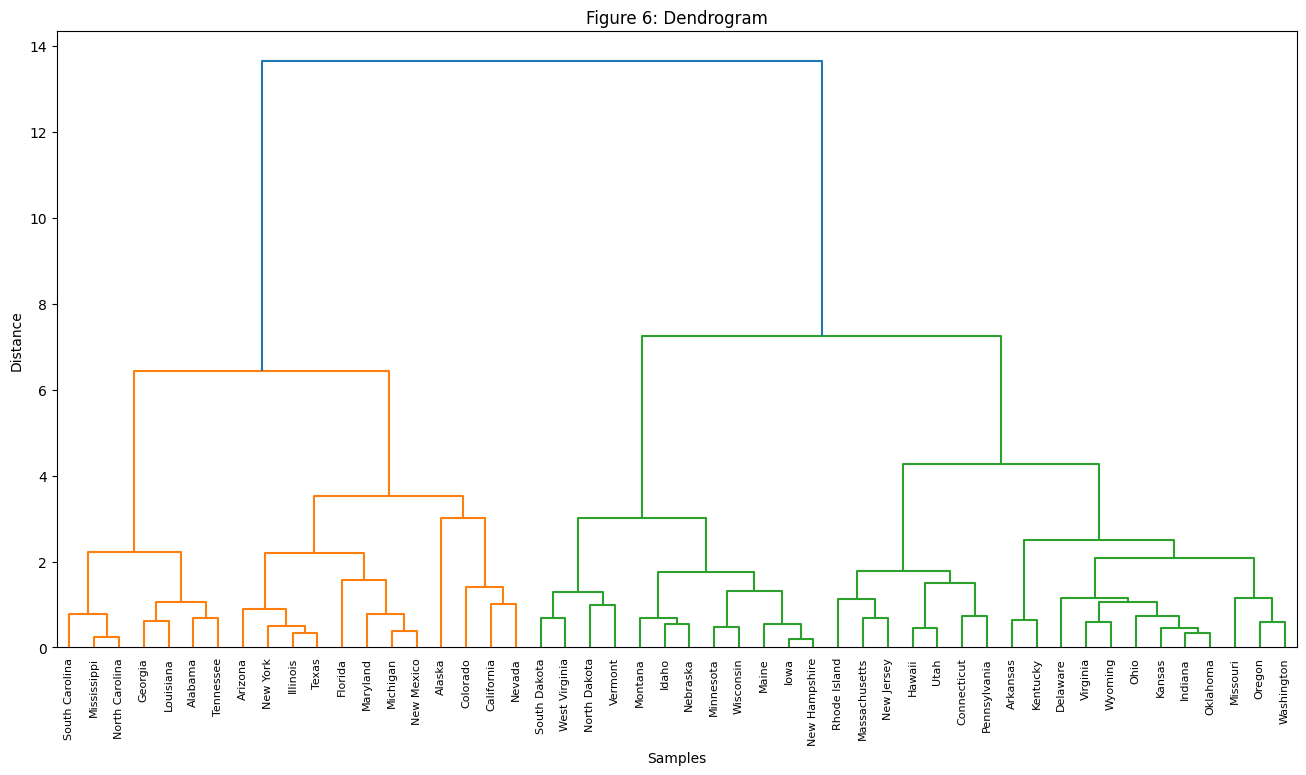

K-Means cluster means: 
                Murder  Assault   Rape  UrbanPop
KMeans_Cluster                                  
0                 4.73   111.83  15.82     64.10
1                13.94   243.62  21.41     53.75
2                10.82   257.38  33.19     76.00
Agglomerative cluster means: 
             Murder  Assault   Rape  UrbanPop
Agg_cluster                                  
1             12.33   259.32  29.22     68.32
2              3.09    76.00  11.83     52.08
3              6.21   142.05  19.18     71.26


In [11]:
# Linkage Matrix
linkages = linkage(X_pca[:, :3], method="ward")

# Cluster labels
cluster_labels = fcluster(linkages, 3, criterion="maxclust")
df["Agg_cluster"] = cluster_labels

# Dendrogram
plt.figure(figsize=(16,8))
dendrogram(linkages, labels=df["City"].values, leaf_rotation=90)
plt.title("Figure 6: Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Cluster Characteristics
print("K-Means cluster means: ")
print(df.groupby("KMeans_Cluster")[features].mean().round(2))

print("Agglomerative cluster means: ")
print(df.groupby("Agg_cluster")[features].mean().round(2))

K-Means: 
Cluster 0 reportedd hte lowest crime, Cluster 1 has high murder and assualt followed by moderate rape and Cluster 2 had the highest assault and rape but mid-high murder.

Agglomerative:
Cluster 1 inidcates high crime, cluster 2 very low crime and cluster 3 moderate crime

Both of the methods discovered that K-Means 0 and Agglomerative 2 had a low crime group.
K-Means 1 and 2 and Agglomerative 1 with a nuance had one high-crime cluster that skews less urban with higher murder (K-Means 1), K-Means 2 skews more urban with higher assaulkt and rape.
Aggolerative spilts "high" vs "moderate" mirroring nuance.
